In [9]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

sys.path.append(os.path.abspath("../src"))  

my_analysis_path = '/home/gus/Documents/REPOS/tmt-analysis/data/hand_analysis/2025-05-05_13-05-32/analysis.csv'
metadata_path = '../data/metadata/metadata.csv'

df = pd.read_csv(my_analysis_path)


In [17]:
pd.read_csv(metadata_path)

df = (
    (
        pd.read_csv(metadata_path)
        .rename(
            columns={
                "Anteojos o lentes de contacto": "anteojos",
                "MMSE / 30": "MMSE",
                "Reloj / 3": "reloj",
                "Nro de participante": "suj",
                "Género": "sex",
                "Edad": "age",
                "Grupo": "group",
                "TMT A papel PB": "tmt_a_raw",
                "TMT B papel PB": "tmt_b_raw",
                "Digit Symbol pb": "digit_symbol_raw",
                "Span directo pb": "forward_digit_pan",
                "span inverso pb": "backward_digit_pan",
            }
        )
        .replace("Caso ?", "Caso")
    )
    .drop([0, 1])
    .reset_index(drop=True)
)  # 0 and 1 are summary

df

,suj,group,Clasificación de caso,Comentario (tipo de caso o criterio de exclusión),ID participante,Fecha,Hora,Neuropsicol.,EyeTracker,sex,age,anteojos,Observaciones,MMSE,MMSE Fallas,tmt_a_raw,TMT A (papel) Z,tmt_b_raw,TMT B papel errores,TMT B (papel) Z,digit_symbol_raw,Digit - symbol Z,forward_digit_pan,Span directo Z,backward_digit_pan,Span inverso z,reloj,Años de escolaridad
0,1,Control,NaN,*,946462,22/1/2024,14:30,Betsabé,Gus,F,52,-,No trajo los lentes para ver de cerca,30.0,--,32.00,0.37,47.00,NaN,1.36,63,0.00,6.0,-0.17,4.0,-0.60,2.0,18.0
1,2,Control,NaN,*,2684844,22/1/2024,15:00,Betsabé,Gus,M,78,Anteojos,NaN,28.0,-2 recuerdo,47.00,0.36,82.00,NaN,0.85,36,0.67,6.0,0.07,5.0,0.5,3.0,16.0
2,3,Caso,DCL MD no amnesico,NaN,6305,22/1/2024,15:30,Laura,Gus,F,68,Anteojos,NaN,28.0,-2 atención,65.00,-0.38,107.00,NaN,0.40,45,0.33,5.0,0.64,4.0,0.21,3.0,12.0
3,4,Caso,DCL MD no amnesico,NaN,2060316,22/1/2024,16:00,Laura,Gus,F,80,Anteojos,NaN,28.0,"-1 atención, -1 recuerdo",55.00,0.03,109.00,NaN,0.36,38,1.33,5.0,-0.64,4.0,-0.21,3.0,15.0
4,5,Caso,DCL MD no amnesico,NaN,4744,22/1/2024,16:30,Betsabé,Gus,F,87,Anteojos,NaN,25.0,"-2 OT. -1 At, -1 rec, -1VC",63.00,-0.29,180.09,(2 errores),-0.92,32,0,5.0,-0.64,3.0,-0.93,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,caso,DCL no amnesico,NaN,2302423,7/10/2024,13hs,Betsabe,Alejandro,F,75,anteojos,NaN,27.0,"1 atenc, 2 recuerdo","38,9","0,69","93,7",2 errores,"0,64",28,"0,00",7.0,"1,58",4.0,"0,80",3.0,12.0
96,98,caso,DCL no amnesico,NaN,3104154,21/10/2024,13hs,Betsabe,Alejandro,F,70,anteojos,NaN,29.0,1 recuerdo,40.36,"-0,63",140.00,4 errores,"0,19",46,"1,00",5.0,"-0,08",4.0,"0,80",3.0,15.0
97,99,caso,DCL no amnesico,NaN,2486596,21/10/2024,1:15:00 p.m.,Betsabe,Alejandro,F,71,NaN,NaN,29.0,1 recuerdo,51.80,"0,16",78.30,NaN,"0,92",42,"0,67",6.0,"0,75",6.0,"2,80",3.0,18.0
98,100,control,NaN,NaN,22945,11/11/2024,13hs,Betsabe,Alejandro,M,76,anteojos,NaN,29.0,1 VC,50.42,"0,22",69.40,-,"1,08",40,"0,67",8.0,"2,42",5.0,"1,80",3.0,18.0


In [34]:
def clean_metadata(path_to_metadata):
    df = (
    (
        pd.read_csv(metadata_path)
        .rename(
            columns={
                "Anteojos o lentes de contacto": "glasses",
                "años de escolaridad": "years of education",
                "MMSE / 30": "MMSE",
                "Reloj / 3": "clock_drawing_test",
                "Nro de participante": "suj",
                "Género": "sex",
                "Edad": "age",
                "Grupo": "group",
                "TMT A papel PB": "tmt_a_raw",
                "TMT B papel PB": "tmt_b_raw",
                "Digit Symbol pb": "digit_symbol_raw",
                "Span directo pb": "forward_digit_pan",
                "span inverso pb": "backward_digit_pan",
            }
        )
        .replace("Caso ?", "Caso")
    )
    .drop([0, 1])
    .reset_index(drop=True) 
    )  # 0 and 1 are summary


    df.columns = [x.lower() for x in df.columns]
    print(df.columns)
    df = df.replace(",", ".", regex=True)
    df["sex"] = df["sex"].replace({"F": 1, "M": 0}).astype("Int64")
    df["group"] = df["group"].str.lower()
    df = df.replace("caso", "mci")
    z_score_cols = [col for col in df.columns if col[-1] == "z"]
    df = df.drop(z_score_cols, axis=1).reset_index(drop=True)
    df = df.replace("Suspendido", 300).replace(
        "No logra", 300
    )  # 300 seconds it is the max time based on the literature
    # df = df.astype({"tmt a papel pb": float, "tmt b papel pb": float})
    df["suj"] = df["suj"].astype(int)
    return df

In [35]:
df_metadata = clean_metadata(metadata_path)
df_metadata

Index(['suj', 'group', 'clasificación de caso',
       'comentario (tipo de caso o criterio de exclusión)', 'id participante',
       'fecha', 'hora', 'neuropsicol.', 'eyetracker', 'sex', 'age', 'glasses',
       'observaciones', 'mmse', 'mmse fallas', 'tmt_a_raw', 'tmt a (papel) z',
       'tmt_b_raw', 'tmt b papel errores', 'tmt b (papel) z',
       'digit_symbol_raw', 'digit - symbol z', 'forward_digit_pan',
       'span directo z', 'backward_digit_pan', 'span inverso z',
       'clock_drawing_test', 'años de escolaridad'],
      dtype='object')


,suj,group,clasificación de caso,comentario (tipo de caso o criterio de exclusión),id participante,fecha,hora,neuropsicol.,eyetracker,sex,age,glasses,observaciones,mmse,mmse fallas,tmt_a_raw,tmt_b_raw,tmt b papel errores,digit_symbol_raw,forward_digit_pan,backward_digit_pan,clock_drawing_test,años de escolaridad
0,1,control,NaN,*,946462,22/1/2024,14:30,Betsabé,Gus,1,52,-,No trajo los lentes para ver de cerca,30.0,--,32.00,47.00,NaN,63,6.0,4.0,2.0,18.0
1,2,control,NaN,*,2684844,22/1/2024,15:00,Betsabé,Gus,0,78,Anteojos,NaN,28.0,-2 recuerdo,47.00,82.00,NaN,36,6.0,5.0,3.0,16.0
2,3,mci,DCL MD no amnesico,NaN,6305,22/1/2024,15:30,Laura,Gus,1,68,Anteojos,NaN,28.0,-2 atención,65.00,107.00,NaN,45,5.0,4.0,3.0,12.0
3,4,mci,DCL MD no amnesico,NaN,2060316,22/1/2024,16:00,Laura,Gus,1,80,Anteojos,NaN,28.0,-1 atención. -1 recuerdo,55.00,109.00,NaN,38,5.0,4.0,3.0,15.0
4,5,mci,DCL MD no amnesico,NaN,4744,22/1/2024,16:30,Betsabé,Gus,1,87,Anteojos,NaN,25.0,-2 OT. -1 At. -1 rec. -1VC,63.00,180.09,(2 errores),32,5.0,3.0,1.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,mci,DCL no amnesico,NaN,2302423,7/10/2024,13hs,Betsabe,Alejandro,1,75,anteojos,NaN,27.0,1 atenc. 2 recuerdo,38.9,93.7,2 errores,28,7.0,4.0,3.0,12.0
96,98,mci,DCL no amnesico,NaN,3104154,21/10/2024,13hs,Betsabe,Alejandro,1,70,anteojos,NaN,29.0,1 recuerdo,40.36,140.00,4 errores,46,5.0,4.0,3.0,15.0
97,99,mci,DCL no amnesico,NaN,2486596,21/10/2024,1:15:00 p.m.,Betsabe,Alejandro,1,71,NaN,NaN,29.0,1 recuerdo,51.80,78.30,NaN,42,6.0,6.0,3.0,18.0
98,100,control,NaN,NaN,22945,11/11/2024,13hs,Betsabe,Alejandro,0,76,anteojos,NaN,29.0,1 VC,50.42,69.40,-,40,8.0,5.0,3.0,18.0


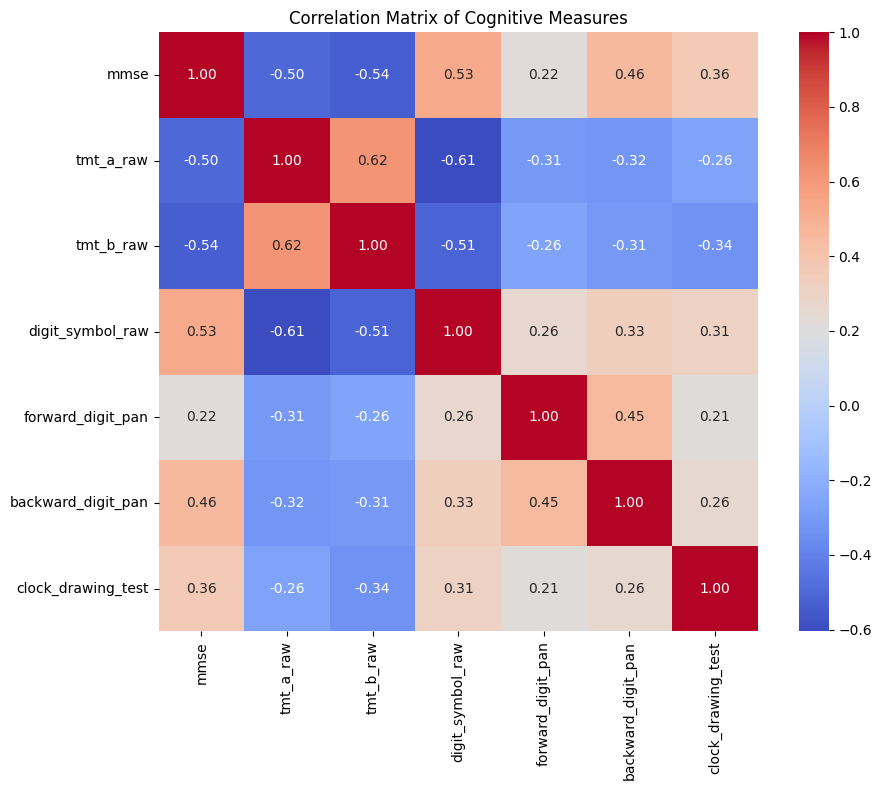

In [37]:


# Clean and convert appropriate columns to numeric
cognitive_columns = ['mmse', 'tmt_a_raw',
                    'tmt_b_raw', 'digit_symbol_raw', 'forward_digit_pan',
                    'backward_digit_pan', 'clock_drawing_test']

demographic_colums = ['sex', 'age', 'group']

# Ensure all cognitive columns are numeric
for col in cognitive_columns:
    df_metadata[col] = pd.to_numeric(df_metadata[col], errors='coerce')

# Compute correlation matrix
corr_matrix = df_metadata[cognitive_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Cognitive Measures")
plt.tight_layout()
plt.show()


In [5]:
df_metadata_cognitive = df_metadata[cognitive_columns].reset_index(names='suj')
df_metadata_cognitive['suj'] = df_metadata_cognitive['suj'] + 1

In [ ]:
df_metadata_cognitive